In [124]:
#Loading libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [125]:
#loading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [126]:
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train data has 1460 rows and 81 columns
----------------------------
The test data has 1459 rows and 80 columns


In [127]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [128]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [129]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [130]:
test.columns[test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

<AxesSubplot:>

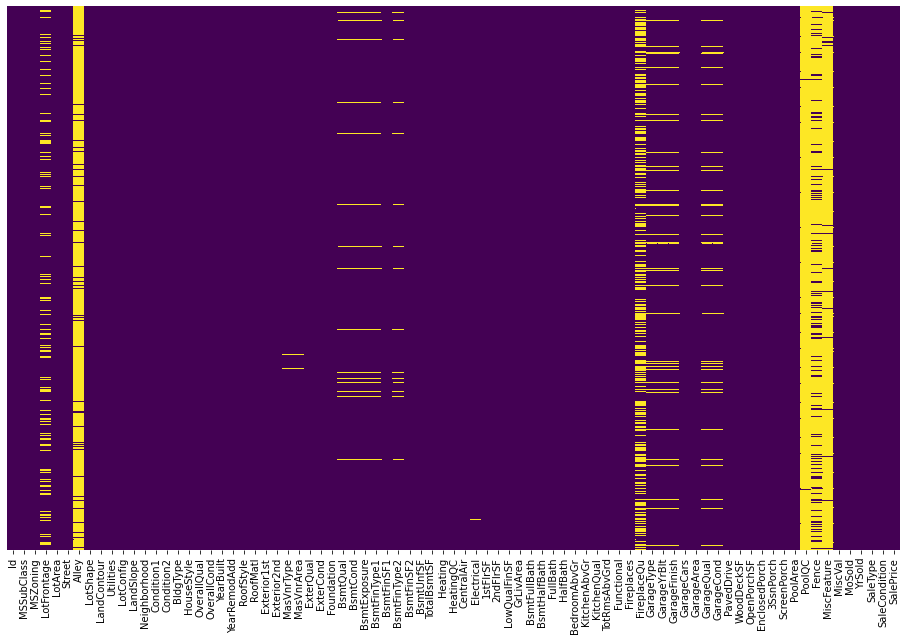

In [131]:
plt.figure(figsize=(16,10))
sns.heatmap(train.isnull(), yticklabels= False, cbar=False, cmap='viridis')

In [132]:
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

In [133]:
train.drop(["LotFrontage","FireplaceQu",    
"Fence",   
"Alley",
"MiscFeature",   
"PoolQC"], inplace = True,axis = 1 )

In [134]:
train.shape

(1460, 75)

In [135]:
test.drop(["LotFrontage","FireplaceQu",    
"Fence",   
"Alley",
"MiscFeature",   
"PoolQC"], inplace = True,axis = 1 )

In [136]:
test.shape

(1459, 74)

<AxesSubplot:>

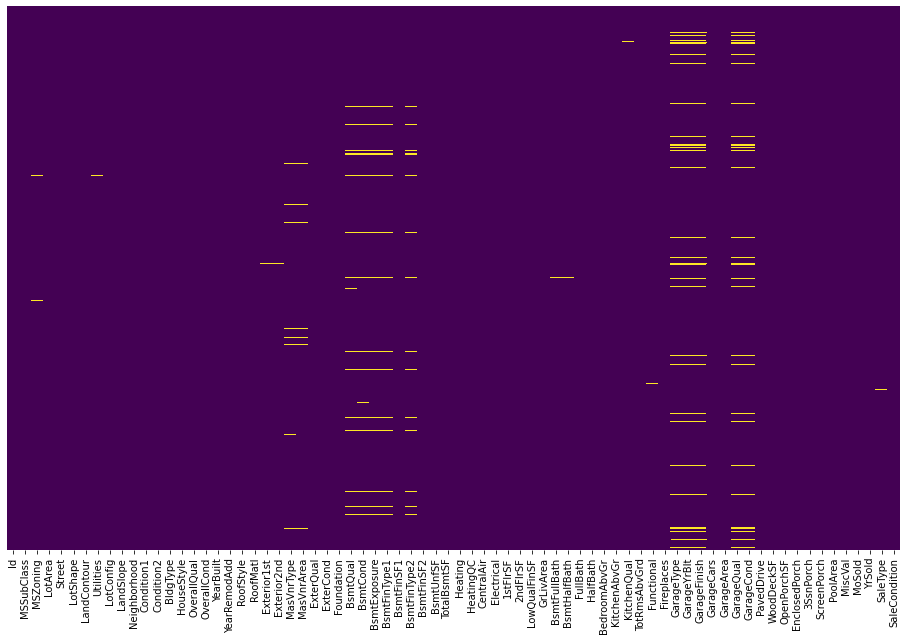

In [137]:
plt.figure(figsize=(16,10))
sns.heatmap(test.isnull(), yticklabels= False, cbar=False, cmap='viridis')

In [138]:
miss = test.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

BsmtUnfSF       0.000685
GarageArea      0.000685
GarageCars      0.000685
KitchenQual     0.000685
TotalBsmtSF     0.000685
BsmtFinSF2      0.000685
BsmtFinSF1      0.000685
SaleType        0.000685
Exterior2nd     0.000685
Exterior1st     0.000685
Utilities       0.001370
Functional      0.001370
BsmtHalfBath    0.001370
BsmtFullBath    0.001370
MSZoning        0.002740
MasVnrArea      0.010274
MasVnrType      0.010959
BsmtFinType2    0.028767
BsmtFinType1    0.028767
BsmtQual        0.030137
BsmtExposure    0.030137
BsmtCond        0.030822
GarageType      0.052055
GarageCond      0.053425
GarageYrBlt     0.053425
GarageFinish    0.053425
GarageQual      0.053425
dtype: float64

In [139]:
#separate variables into new data frames
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print (f"There are {numeric_data.shape[1]} numeric and {cat_data.shape[1]} categorical columns in train data")

There are 37 numeric and 38 categorical columns in train data


In [140]:
numeric_data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,14115,5,5,1993,1995,0.0,732,0,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,10084,8,5,2004,2005,186.0,1369,0,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,10382,7,6,1973,1973,240.0,859,32,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,7420,5,6,1939,1950,0.0,851,0,...,0,4,0,0,0,0,0,1,2008,118000


In [141]:
cat_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,FuseF,TA,Min1,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,SBrkr,TA,Typ,Attchd,RFn,Gd,TA,Y,WD,Normal


In [142]:
del numeric_data['Id']

In [143]:
numeric_data.shape

(1460, 36)

In [144]:
numeric_data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [145]:
cat_data.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1334,735,1360,870,605,1311,1326,1340,1267,1198


<AxesSubplot:>

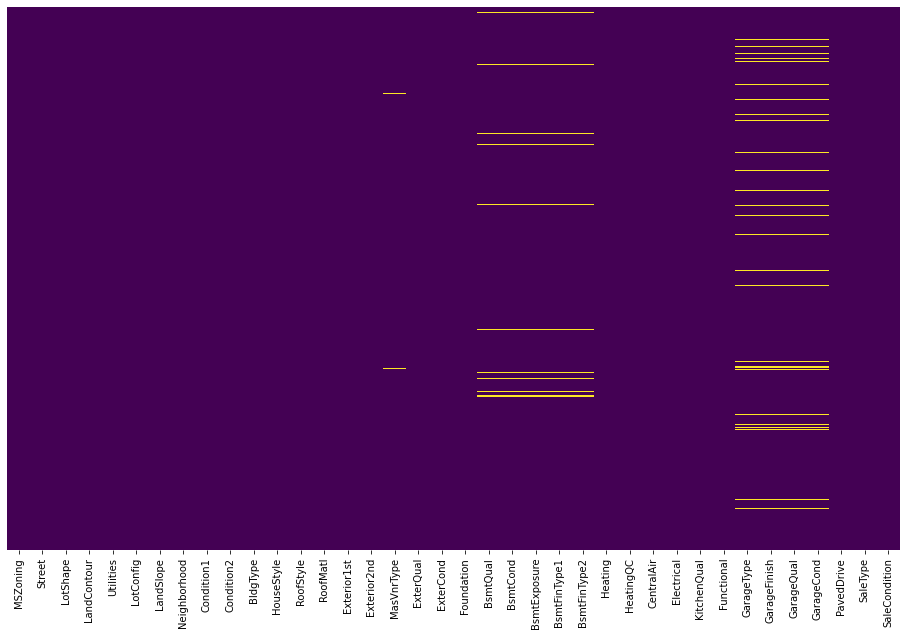

In [146]:
plt.figure(figsize=(16,10))
sns.heatmap(cat_data.isnull(), yticklabels= False, cbar=False, cmap='viridis')

In [147]:
cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [148]:
numeric_data.isnull().sum()

MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [149]:
numeric_data = numeric_data.apply(lambda x: x.fillna(x.median()))

<AxesSubplot:>

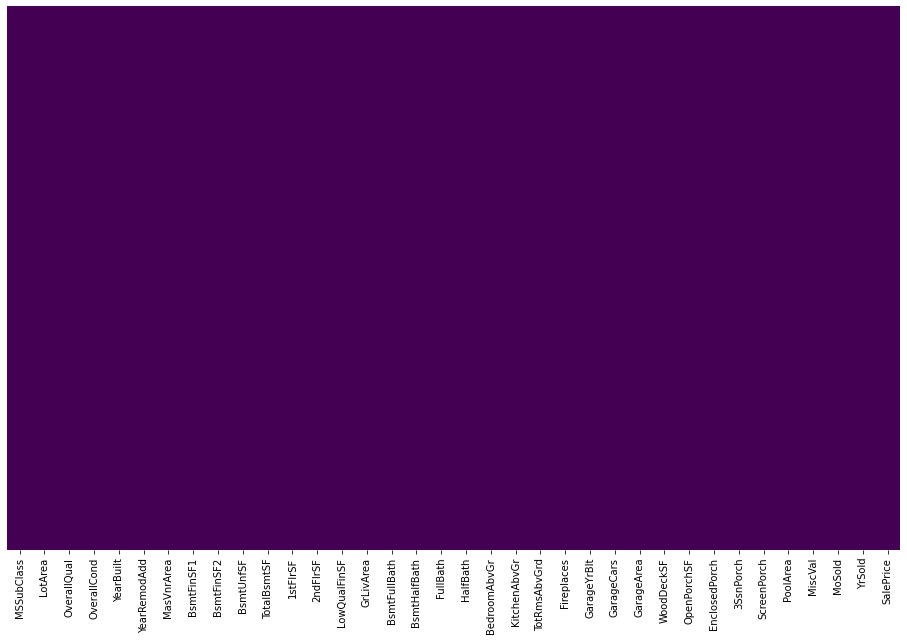

In [150]:
plt.figure(figsize=(16,10))
sns.heatmap(numeric_data.isnull(), yticklabels= False, cbar=False, cmap='viridis')

In [151]:
for i in cat_data:
    print(i , cat_data[i].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF

In [152]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [153]:
#importing function
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var):
    le.fit(data[var])
    data[var] = le.transform(data[var])
    return data

In [154]:
cat_data["ExterQual"]

0       Gd
1       TA
2       Gd
3       TA
4       Gd
5       TA
6       Gd
7       TA
8       TA
9       TA
10      TA
11      Ex
12      TA
13      Gd
14      TA
15      TA
16      TA
17      TA
18      TA
19      TA
20      Gd
21      TA
22      Gd
23      TA
24      TA
25      Gd
26      TA
27      Gd
28      TA
29      TA
30      TA
31      TA
32      Gd
33      TA
34      Ex
35      Gd
36      TA
37      TA
38      TA
39      TA
40      TA
41      TA
42      TA
43      TA
44      TA
45      Ex
46      Gd
47      Gd
48      TA
49      TA
50      TA
51      TA
52      Fa
53      Gd
54      TA
55      TA
56      Gd
57      Gd
58      Ex
59      TA
60      TA
61      TA
62      Gd
63      TA
64      TA
65      Gd
66      TA
67      Gd
68      TA
69      Gd
70      TA
71      TA
72      TA
73      TA
74      Gd
75      TA
76      TA
77      TA
78      TA
79      TA
80      TA
81      TA
82      TA
83      TA
84      TA
85      Gd
86      Gd
87      Gd
88      Fa
89      TA
90      TA

In [155]:
qual_dict = {np.nan: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
name = np.array(['ExterQual' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual', 'GarageQual','GarageCond'])


In [156]:
for i in name:
     cat_data[i] = cat_data[i].map(qual_dict).astype(int)

In [157]:
cat_data["BsmtQual"]

0       4
1       4
2       4
3       3
4       4
5       4
6       5
7       4
8       3
9       3
10      3
11      5
12      3
13      4
14      3
15      3
16      3
17      3
18      3
19      3
20      5
21      3
22      4
23      4
24      3
25      4
26      3
27      5
28      3
29      3
30      3
31      3
32      5
33      3
34      5
35      5
36      4
37      3
38      3
39      3
40      3
41      3
42      4
43      4
44      3
45      5
46      5
47      4
48      3
49      3
50      4
51      3
52      4
53      5
54      3
55      3
56      4
57      4
58      5
59      3
60      4
61      3
62      4
63      3
64      4
65      5
66      4
67      4
68      3
69      3
70      4
71      3
72      4
73      3
74      2
75      4
76      3
77      3
78      3
79      3
80      4
81      5
82      4
83      3
84      4
85      4
86      4
87      4
88      3
89      4
90      3
91      3
92      4
93      3
94      4
95      4
96      4
97      3
98      3
99      3


In [158]:
# cat_data["BsmtExposure"] = cat_data["BsmtExposure"].map({np.nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

bsmt_fin_dict = {np.nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
cat_data["BsmtFinType1"] = cat_data["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
cat_data["BsmtFinType2"] = cat_data["BsmtFinType2"].map(bsmt_fin_dict).astype(int)
cat_data["Functional"] = cat_data["Functional"].map({np.nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

cat_data["GarageFinish"] = cat_data["GarageFinish"].map({np.nan: 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)
# cat_data["Fence"] = cat_data["Fence"].map({np.nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

# #encoding data
# cat_data["CentralAir"] = (cat_data["CentralAir"] == "Y") * 1.0
varst = np.array(['LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Foundation','SaleCondition'])



In [159]:
cat_data.BsmtFinType1.unique()

array([6, 5, 1, 3, 4, 2])

In [160]:
cat_data.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual         int32
ExterCond         int32
Foundation       object
BsmtQual          int32
BsmtCond          int32
BsmtExposure     object
BsmtFinType1      int32
BsmtFinType2      int32
Heating          object
HeatingQC         int32
CentralAir       object
Electrical       object
KitchenQual       int32
Functional        int32
GarageType       object
GarageFinish      int32
GarageQual        int32
GarageCond        int32
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [161]:
varst = np.array(['LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Foundation','SaleCondition'])

In [162]:
cat_data = factorize(cat_data,"MSZoning")

In [163]:
cat_data['MSZoning'].unique()

array([3, 4, 0, 1, 2])

In [164]:
def onehot(df, column_name):
        dummies = pd.get_dummies(df[column_name], prefix="_"+column_name)
        df  = df.join(dummies)
        df = df.drop([column_name], axis=1)
        return df

In [165]:
cat_data = onehot(cat_data, "SaleType")

In [166]:
pd.set_option('display.max_rows', None)

In [167]:
cat_data.dtypes

MSZoning            int32
Street             object
LotShape           object
LandContour        object
Utilities          object
LotConfig          object
LandSlope          object
Neighborhood       object
Condition1         object
Condition2         object
BldgType           object
HouseStyle         object
RoofStyle          object
RoofMatl           object
Exterior1st        object
Exterior2nd        object
MasVnrType         object
ExterQual           int32
ExterCond           int32
Foundation         object
BsmtQual            int32
BsmtCond            int32
BsmtExposure       object
BsmtFinType1        int32
BsmtFinType2        int32
Heating            object
HeatingQC           int32
CentralAir         object
Electrical         object
KitchenQual         int32
Functional          int32
GarageType         object
GarageFinish        int32
GarageQual          int32
GarageCond          int32
PavedDrive         object
SaleCondition      object
_SaleType_COD       uint8
_SaleType_CW

In [168]:
# onehot_df = onehot(onehot_df, df, "MSSubClass", None)
# onehot_df = onehot(onehot_df, df, "MSZoning", "RL")
# onehot_df = onehot(onehot_df, df, "LotConfig", None)
# onehot_df = onehot(onehot_df, df, "Neighborhood", None)
# onehot_df = onehot(onehot_df, df, "Condition1", None)
# onehot_df = onehot(onehot_df, df, "BldgType", None)
# onehot_df = onehot(onehot_df, df, "HouseStyle", None)
# onehot_df = onehot(onehot_df, df, "RoofStyle", None)
# onehot_df = onehot(onehot_df, df, "Exterior1st", "VinylSd")
# onehot_df = onehot(onehot_df, df, "Exterior2nd", "VinylSd")
# onehot_df = onehot(onehot_df, df, "Foundation", None)
# onehot_df = onehot(onehot_df, df, "SaleType", "WD")
# onehot_df = onehot(onehot_df, df, "SaleCondition", "Normal")

In [169]:
cat_data = onehot(cat_data, "MSZoning")

In [170]:
l = ['LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','Foundation','SaleCondition']

In [171]:
for i in l:
    cat_data = onehot(cat_data,i)

In [172]:
l = cat_data.select_dtypes(include  ="object").columns

In [173]:
l= list(l)

In [174]:
l

['Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'MasVnrType',
 'BsmtExposure',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'PavedDrive']

In [175]:
for i in l:
    cat_data = onehot(cat_data,i)

In [176]:
cat_data.shape

(1460, 188)

In [177]:
numeric_data.shape

(1460, 36)

In [178]:
Y = numeric_data["SalePrice"]

In [179]:
numeric_data.drop(['SalePrice'],axis = 1,inplace = True)

In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [181]:
numeric_data[numeric_data.columns] = scaler.fit_transform(numeric_data[numeric_data.columns])

In [183]:
numeric_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [184]:
numeric_data.shape

(1460, 35)

### 7. Model Training and Evaluation

In [185]:
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)

In [186]:
X = numeric_data.join(cat_data)

In [187]:
X.shape

(1460, 223)

In [188]:
import sklearn

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [190]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.33,random_state=45)

In [191]:
print("X_train shape =",X_train.shape)
print("X_test shape =",X_test.shape)
print("Y_train shape =",Y_train.shape)
print("Y_test shape =",Y_test.shape)

X_train shape = (978, 223)
X_test shape = (482, 223)
Y_train shape = (978,)
Y_test shape = (482,)


In [192]:
regr.fit(X_train,Y_train)

[00:11:57] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1.5, missing=nan,
             monotone_constraints='()', n_estimators=7200, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1, seed=42,
             silent=1, subsample=0.2, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [193]:
Y_pre = regr.predict(X_test)

In [194]:
r2_score(Y_test,Y_pre)

0.8861735915388402

In [195]:
mean_squared_error(Y_test,Y_pre)

694075060.9924395

In [196]:
n,p = (978, 223)

In [197]:
Adj_r2 = 1-(1-r2_score(Y_test,Y_pre))*(n-1)/(n-p-1)

In [198]:
Adj_r2

0.8525087519011232

### Lasso regression

In [199]:
from sklearn.linear_model import Lasso

In [200]:
lasso_reg = Lasso(alpha = 0.0009, max_iter=50000)

In [201]:
lasso_reg.fit(X_train,Y_train)

C:\Users\Uddeshya Sahu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.404e+10, tolerance: 6.269e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.0009, max_iter=50000)

In [202]:
Y_pre = lasso_reg.predict(X_test)

In [203]:
r2_score(Y_test,Y_pre)

0.8180303197047255

### Ridge Regression

In [204]:
from sklearn.linear_model import Ridge

In [205]:
ridge_reg = Ridge(alpha = 0.0009,max_iter= 50000)

In [206]:
ridge_reg.fit(X_train,Y_train)

Ridge(alpha=0.0009, max_iter=50000)

In [207]:
Y_pre = ridge_reg.predict(X_test)

In [208]:
r2_score(Y_test,Y_pre)

0.8124387902632675

In [209]:
Adj_r2 = 1-(1-r2_score(Y_test,Y_pre))*(n-1)/(n-p-1)

In [210]:
Adj_r2

0.7569664430864885

### Partial least square regression

In [216]:

from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
 
# Define PLS object
pls = PLSRegression(n_components=50)
 
# Fit
pls.fit(X_train, Y_train)
 
# Cross-validation
y_cv = cross_val_predict(pls, X_train, Y_train, cv=10)
 
# Calculate scores
score = r2_score(Y_train, y_cv)
mse = mean_squared_error(Y_train, y_cv)

In [217]:
print(score)

0.724875885590359
